In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [2]:
data.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [3]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [4]:
# List of columns containing numeric data
numeric_columns = [
    'Number of Services',  # Total count of services provided
    'Number of Medicare Beneficiaries',  # Total number of unique Medicare beneficiaries served
    'Number of Distinct Medicare Beneficiary/Per Day Services',  # Count of distinct services provided to beneficiaries per day
    'Average Medicare Allowed Amount',  # Average amount allowed by Medicare for services
    'Average Submitted Charge Amount',  # Average amount charged for services before any adjustments
    'Average Medicare Payment Amount',  # Average payment amount made by Medicare
    'Average Medicare Standardized Amount'  # Average standardized amount adjusted for comparison purposes
]
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
       
data.info()
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [5]:
# Looking for Missing Values and imputing them with Mean
print(data.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [6]:
# Imputation of missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print(data.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [7]:
# Check for duplicates
print(data.duplicated().sum())

0


In [8]:
# Data Preprocessing
# Create a new column 'Full Name' by concatenating the first name, middle initial, and last name/organization name
# Fill NaN values with an empty string to ensure concatenation works correctly
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')

# Remove any leading or trailing whitespace from the 'Full Name' column
data['Full Name'] = data['Full Name'].str.strip()

# Drop the now redundant columns: 'First Name of the Provider', 'Middle Initial of the Provider', and 
# 'Last Name/Organization Name of the Provider'
data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])
data.head


<bound method NDFrame.head of          index  National Provider Identifier Credentials of the Provider  \
0      8774979                    1891106191                        M.D.   
1      3354385                    1346202256                        M.D.   
2      3001884                    1306820956                         DPM   
3      7594822                    1770523540                          MD   
4       746159                    1073627758                          DO   
...        ...                           ...                         ...   
99995  3837311                    1386938868                          PT   
99996  2079360                    1215091327                        ARNP   
99997  8927965                    1902868185                        M.D.   
99998  8854571                    1891941183                         NaN   
99999  3547535                    1356772156                         NaN   

      Gender of the Provider Entity Type of the Provider 

In [9]:
# Merging the address columns 
data['Full Address'] = data['Street Address 1 of the Provider'].fillna('') + ' ' + \
                       data['Street Address 2 of the Provider'].fillna('')
data['Full Address'] = data['Full Address'].str.strip()

data = data.drop(columns=['Street Address 1 of the Provider', 
                          'Street Address 2 of the Provider'])

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name,Full Address
0,8774979,1891106191,M.D.,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA,1402 S GRAND BLVD FDT 14TH FLOOR
1,3354385,1346202256,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES,2950 VILLAGE DR
2,3001884,1306820956,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER,20 WASHINGTON AVE STE 212
3,7594822,1770523540,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD,5746 N BROADWAY ST
4,746159,1073627758,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI,875 MILITARY TRL SUITE 200


In [10]:
# Define the column name for provider credentials
credentials_column = 'Credentials of the Provider'

# Standardize the credentials by removing periods and converting to uppercase
data[credentials_column] = data[credentials_column].str.replace(r'\.', '', regex=True).str.upper()

# Display the first few rows of the dataframe to verify the changes
data.head()


,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name,Full Address
0,8774979,1891106191,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA,1402 S GRAND BLVD FDT 14TH FLOOR
1,3354385,1346202256,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES,2950 VILLAGE DR
2,3001884,1306820956,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER,20 WASHINGTON AVE STE 212
3,7594822,1770523540,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD,5746 N BROADWAY ST
4,746159,1073627758,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI,875 MILITARY TRL SUITE 200


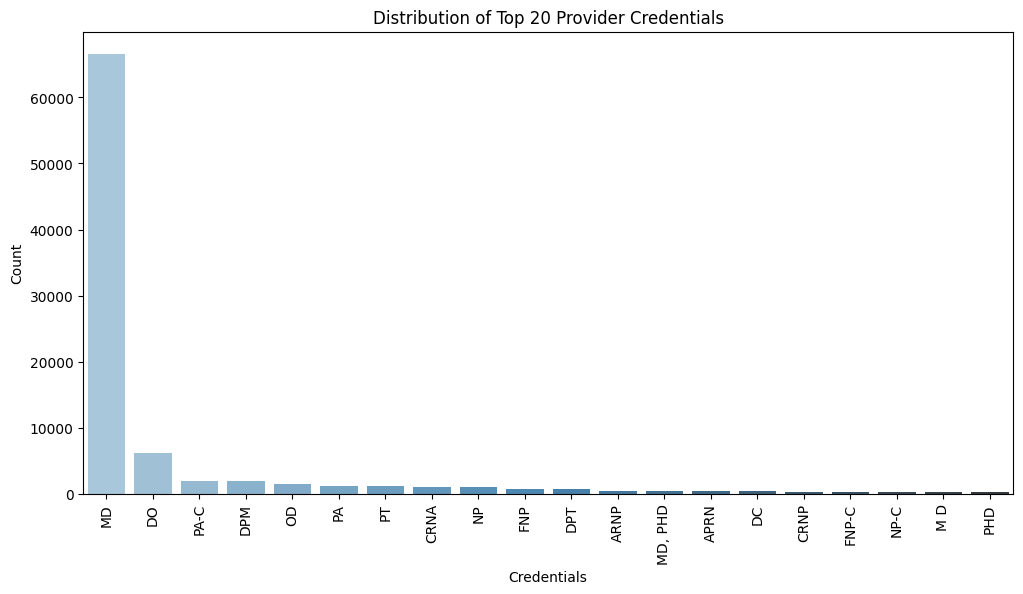

In [26]:
# GRAPHS:

# Calculate the top 20 most common credentials
top_credentials_counts = data['Credentials of the Provider'].value_counts().head(20)

# Create a bar plot for the top 20 most common credentials
plt.figure(figsize=(12, 6))
sns.barplot(x=top_credentials_counts.index, y=top_credentials_counts.values, palette='Blues_d')  # Custom color palette
plt.title('Distribution of Top 20 Provider Credentials')  # Set the title of the plot
plt.xlabel('Credentials')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot



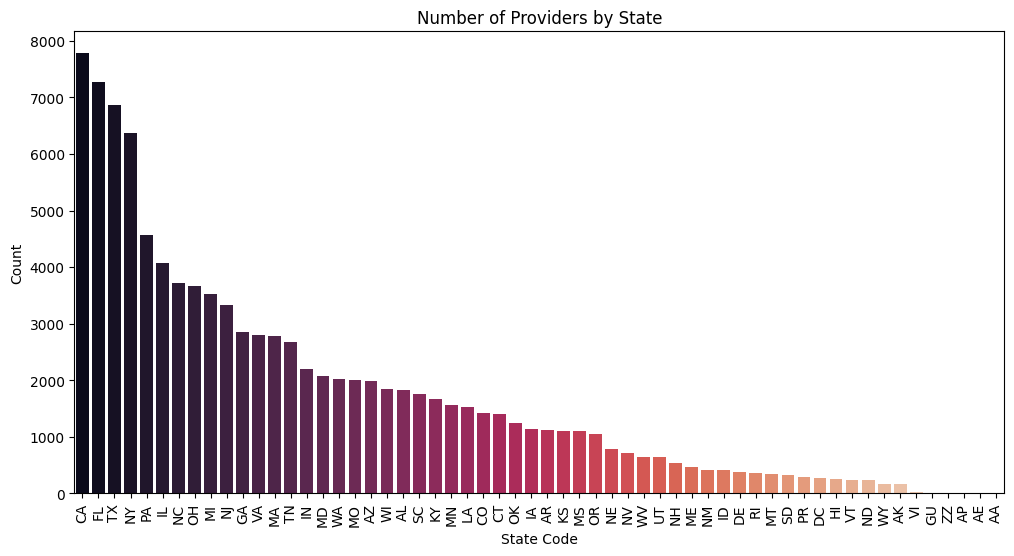

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the counts of providers by state code
provider_counts_by_state = data['State Code of the Provider'].value_counts()

# Create a bar plot for the number of providers by state
plt.figure(figsize=(12, 6))
sns.barplot(x=provider_counts_by_state.index, y=provider_counts_by_state.values, palette='rocket')
plt.title('Number of Providers by State')  # Set the title of the plot
plt.xlabel('State Code')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot


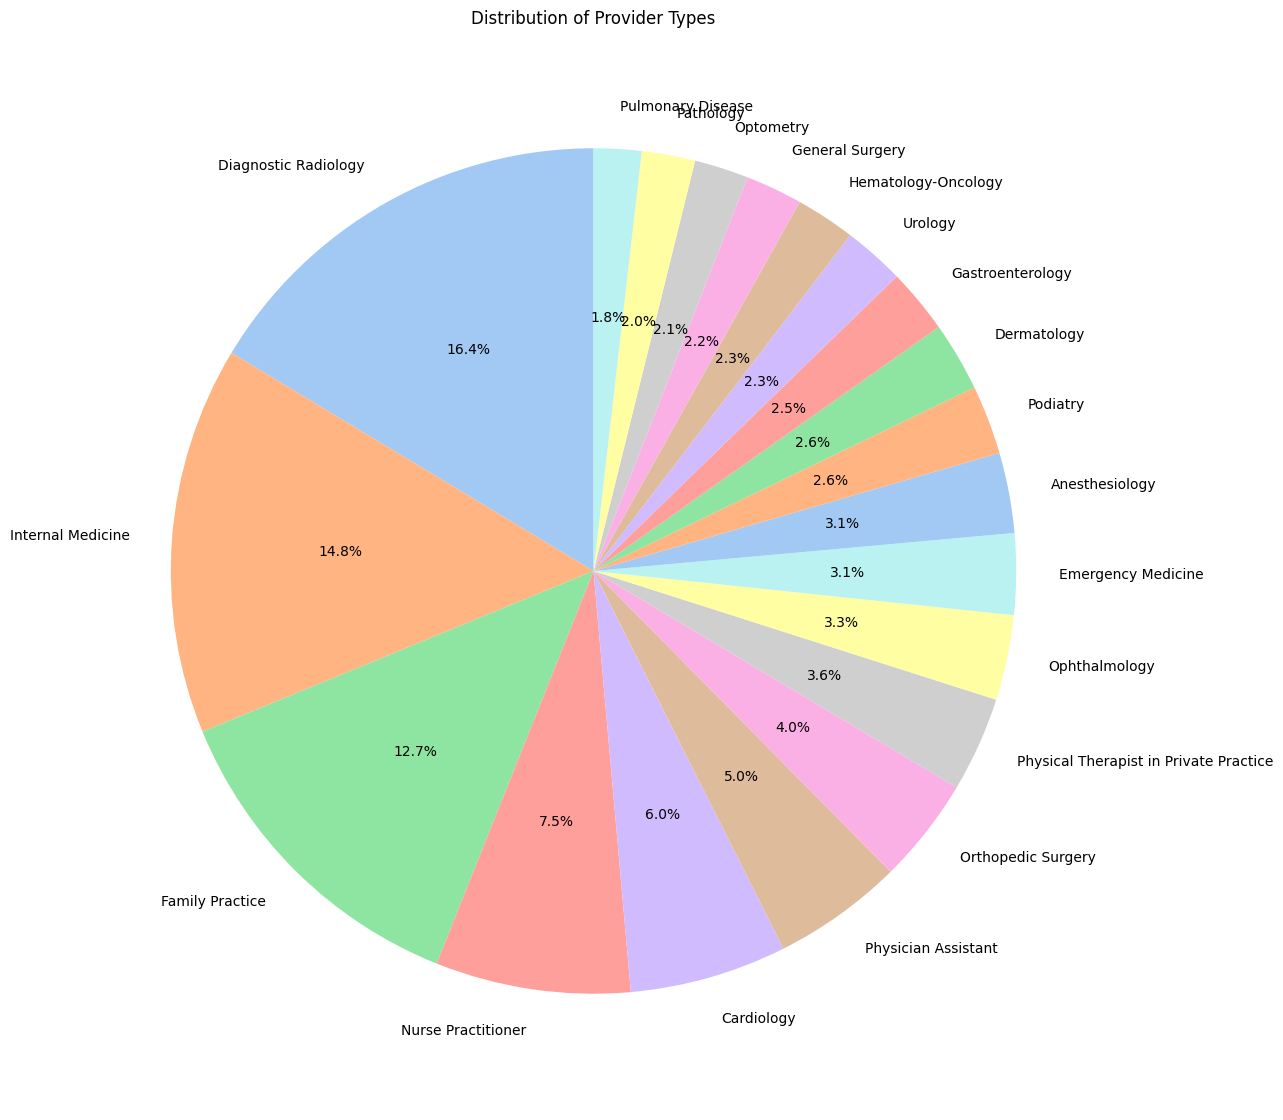

In [13]:
import matplotlib.pyplot as plt

# Calculate the top 20 most common provider types
top_provider_type_counts = data['Provider Type'].value_counts().head(20)

# Define a custom color palette for the pie chart
colors = sns.color_palette('pastel', n_colors=len(top_provider_type_counts))

# Create a pie chart for the top 20 provider types
plt.figure(figsize=(12, 14))
plt.pie(top_provider_type_counts, labels=top_provider_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Provider Types')  # Set the title of the pie chart
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()  # Display the pie chart


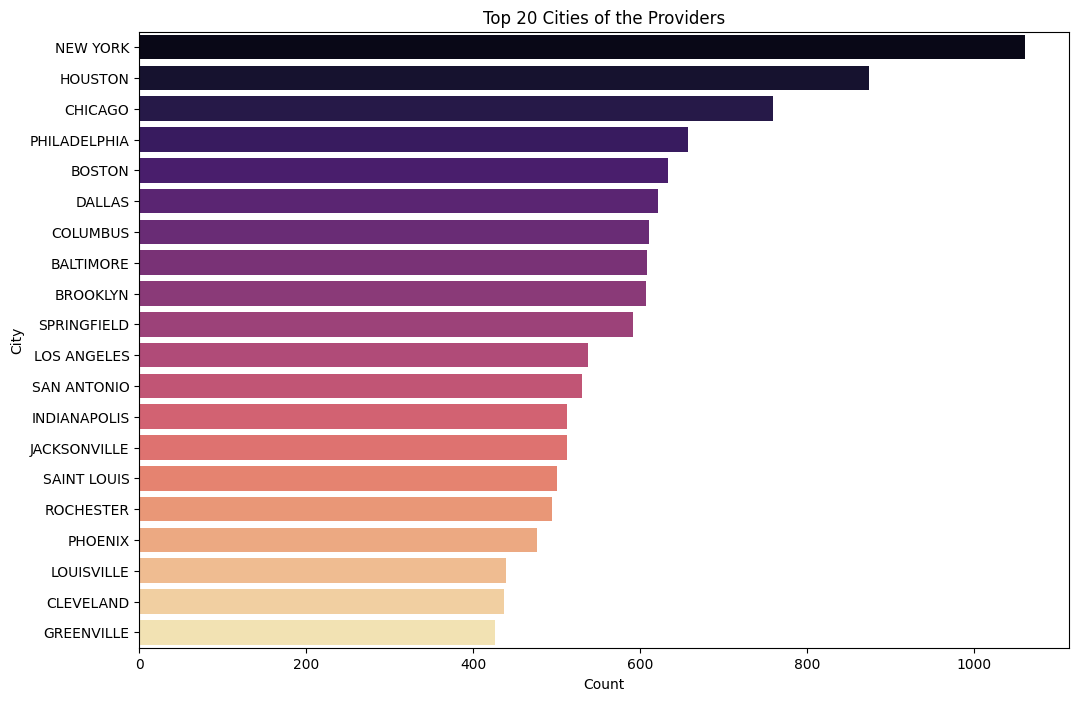

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the top 20 cities with the most providers
top_city_counts = data['City of the Provider'].value_counts().head(20)

# Create a horizontal bar plot for the top 20 cities
plt.figure(figsize=(12, 8))
sns.barplot(x=top_city_counts.values, y=top_city_counts.index, palette='magma')
plt.title('Top 20 Cities of the Providers')  # Set the title of the plot
plt.xlabel('Count')  # Set the label for the x-axis
plt.ylabel('City')  # Set the label for the y-axis
plt.show()  # Display the plot


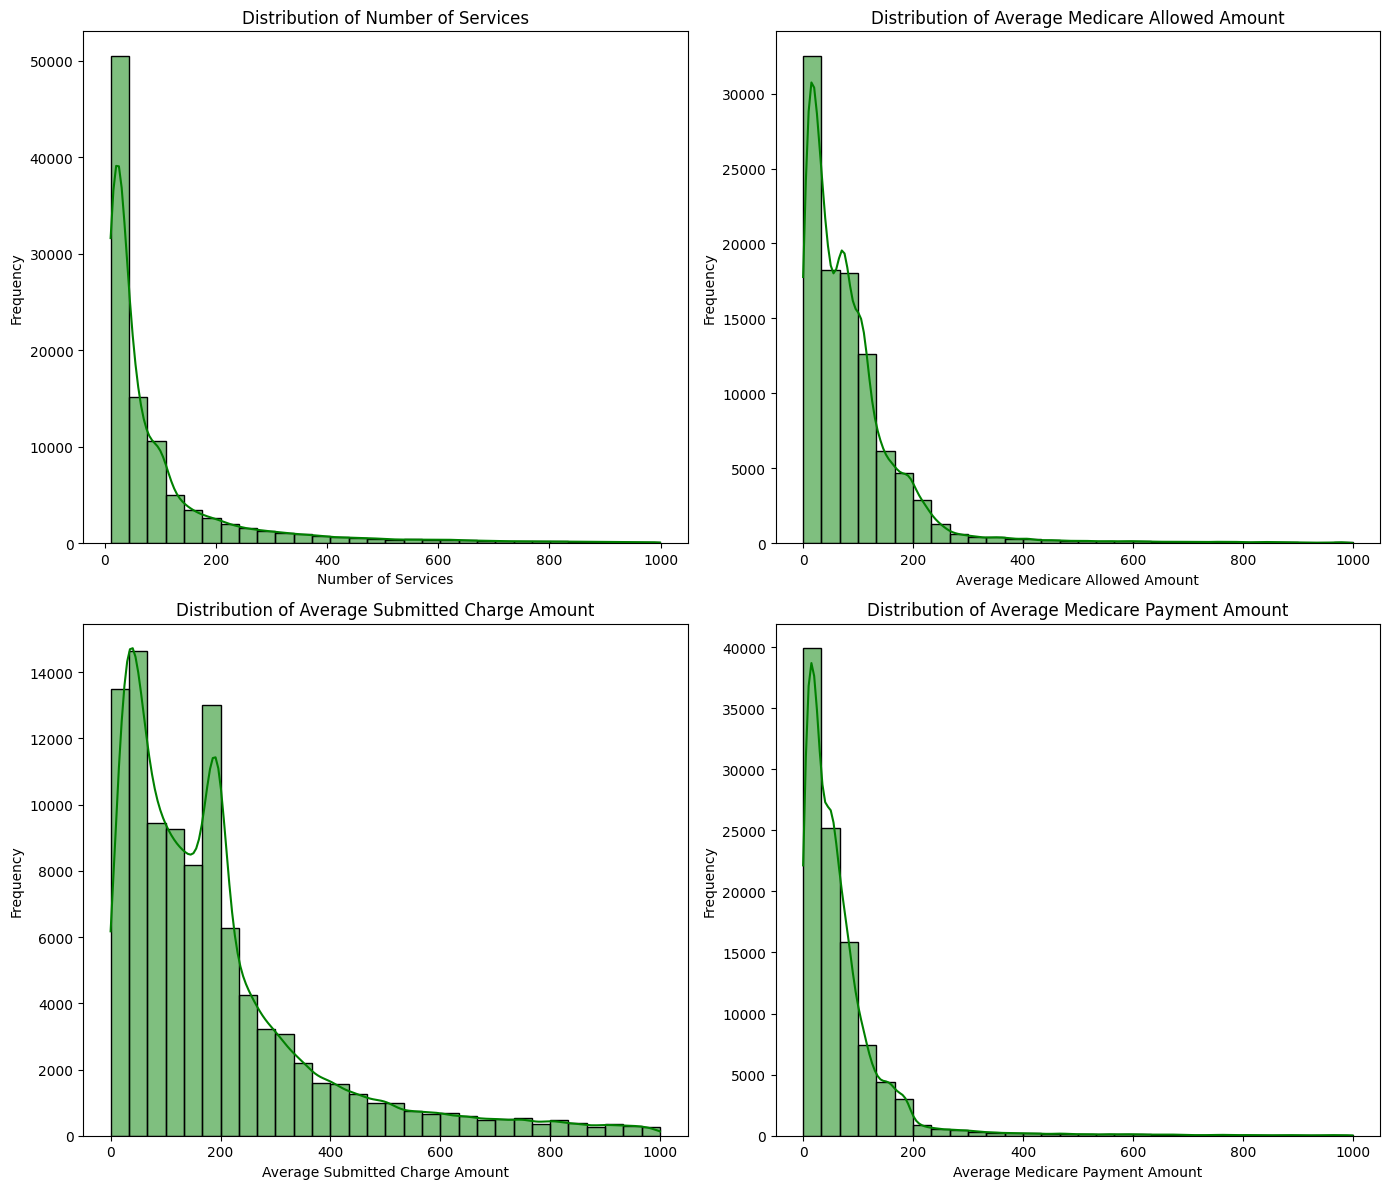

In [15]:


# List of columns containing numeric data
numeric_columns = [
    'Number of Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]

# Convert columns to numeric, coercing errors to NaN
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Set up the figure for subplots
plt.figure(figsize=(14, 12))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each column
    sns.histplot(data[column].dropna(), bins=30, kde=True, color='green')  # Plot histogram with KDE
    plt.title(f'Distribution of {column}')  # Set the title for each subplot
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()  # Display the plots


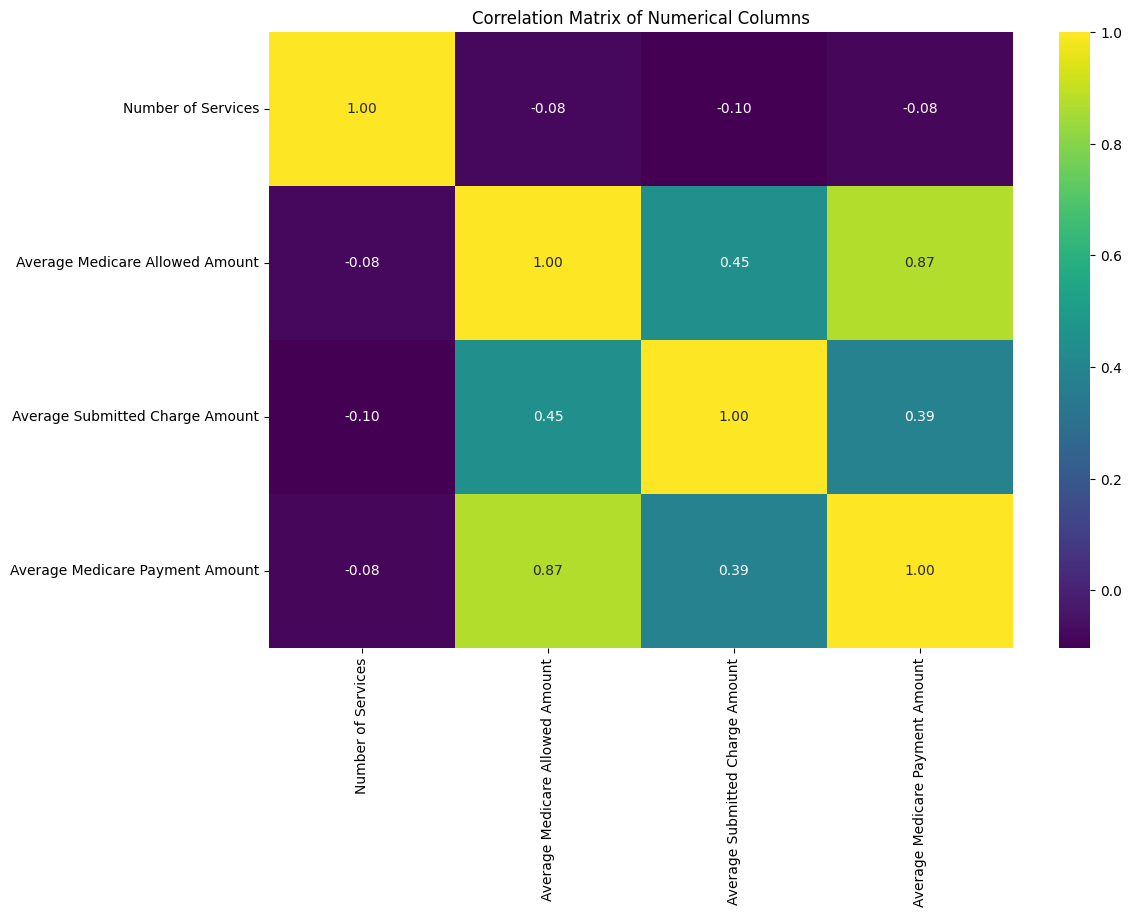

In [16]:


# List of columns containing numeric data
numeric_columns = [
    'Number of Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]

# Calculate the correlation matrix for the numeric columns
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')  # Set the title for the heatmap
plt.show()  # Display the heatmap


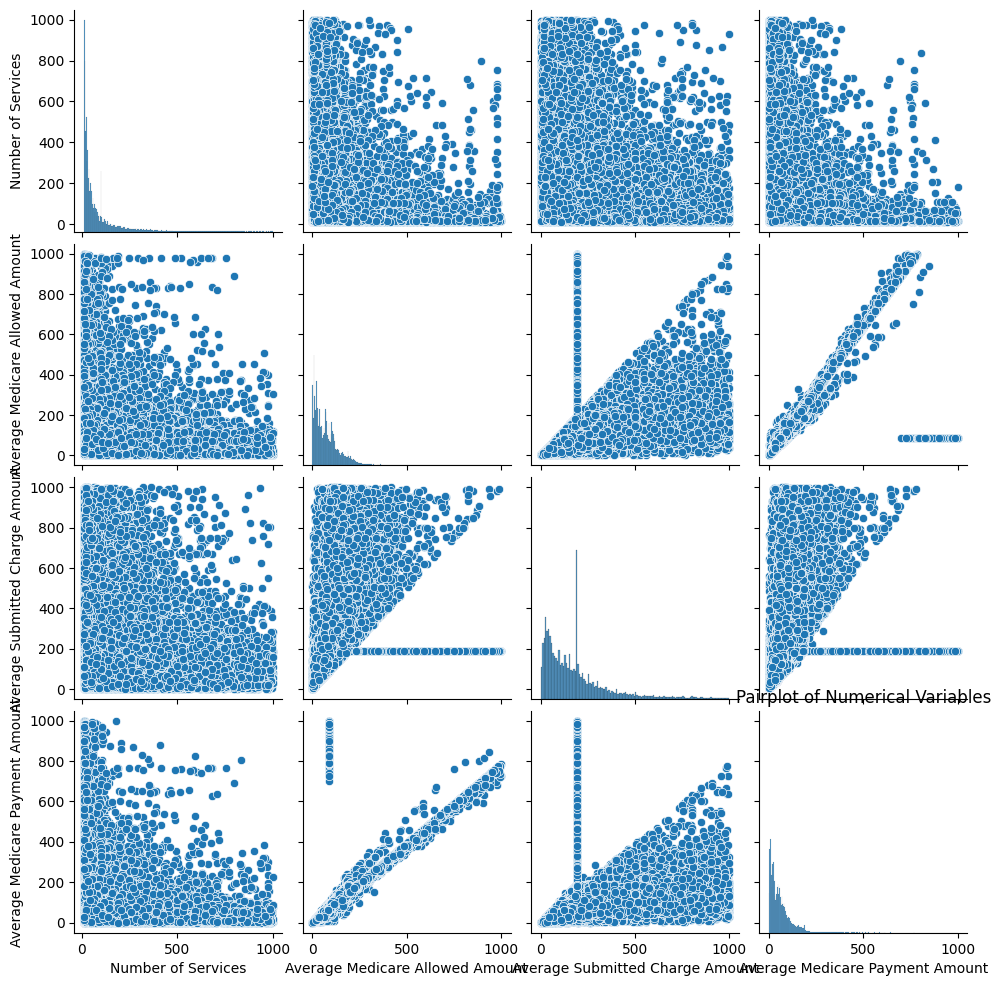

In [17]:
sns.pairplot(data[numeric_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()

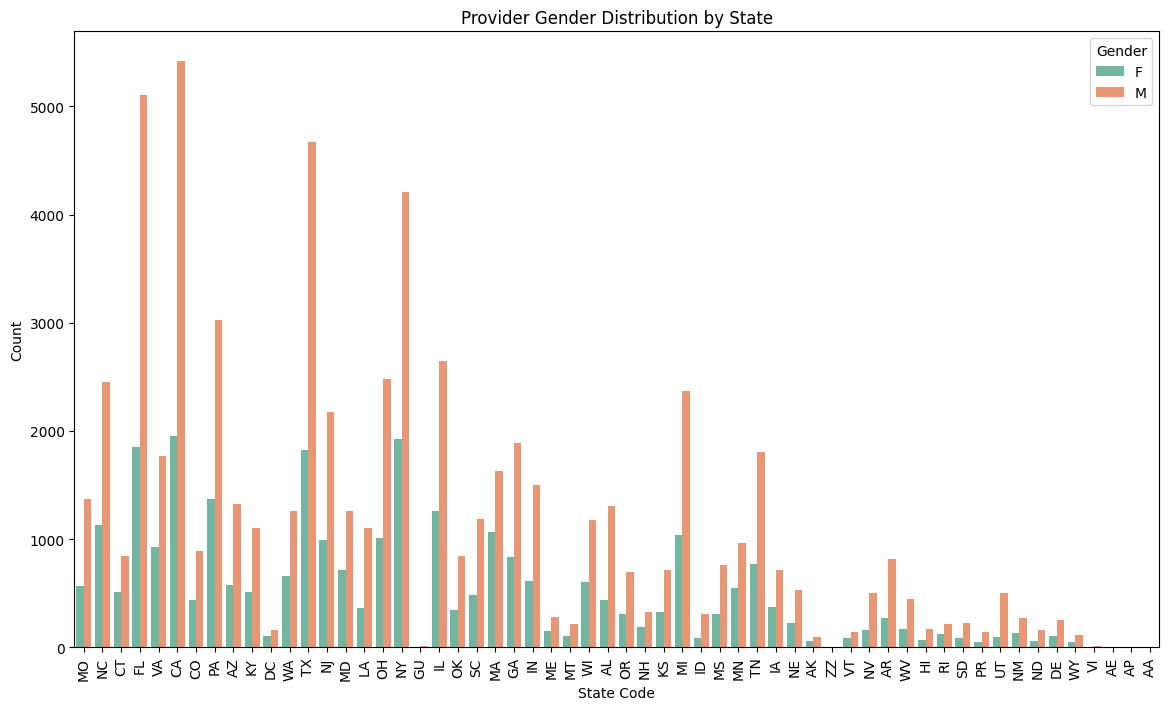

In [18]:
# Bivariate Analysis
plt.figure(figsize=(14, 8))

# Countplot of Provider Gender Distribution by State
sns.countplot(x='State Code of the Provider', hue='Gender of the Provider', data=data, palette='Set2')

# Set title and labels
plt.title('Provider Gender Distribution by State')
plt.xlabel('State Code')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend with a title for gender
plt.legend(title='Gender')

# Display the plot
plt.show()


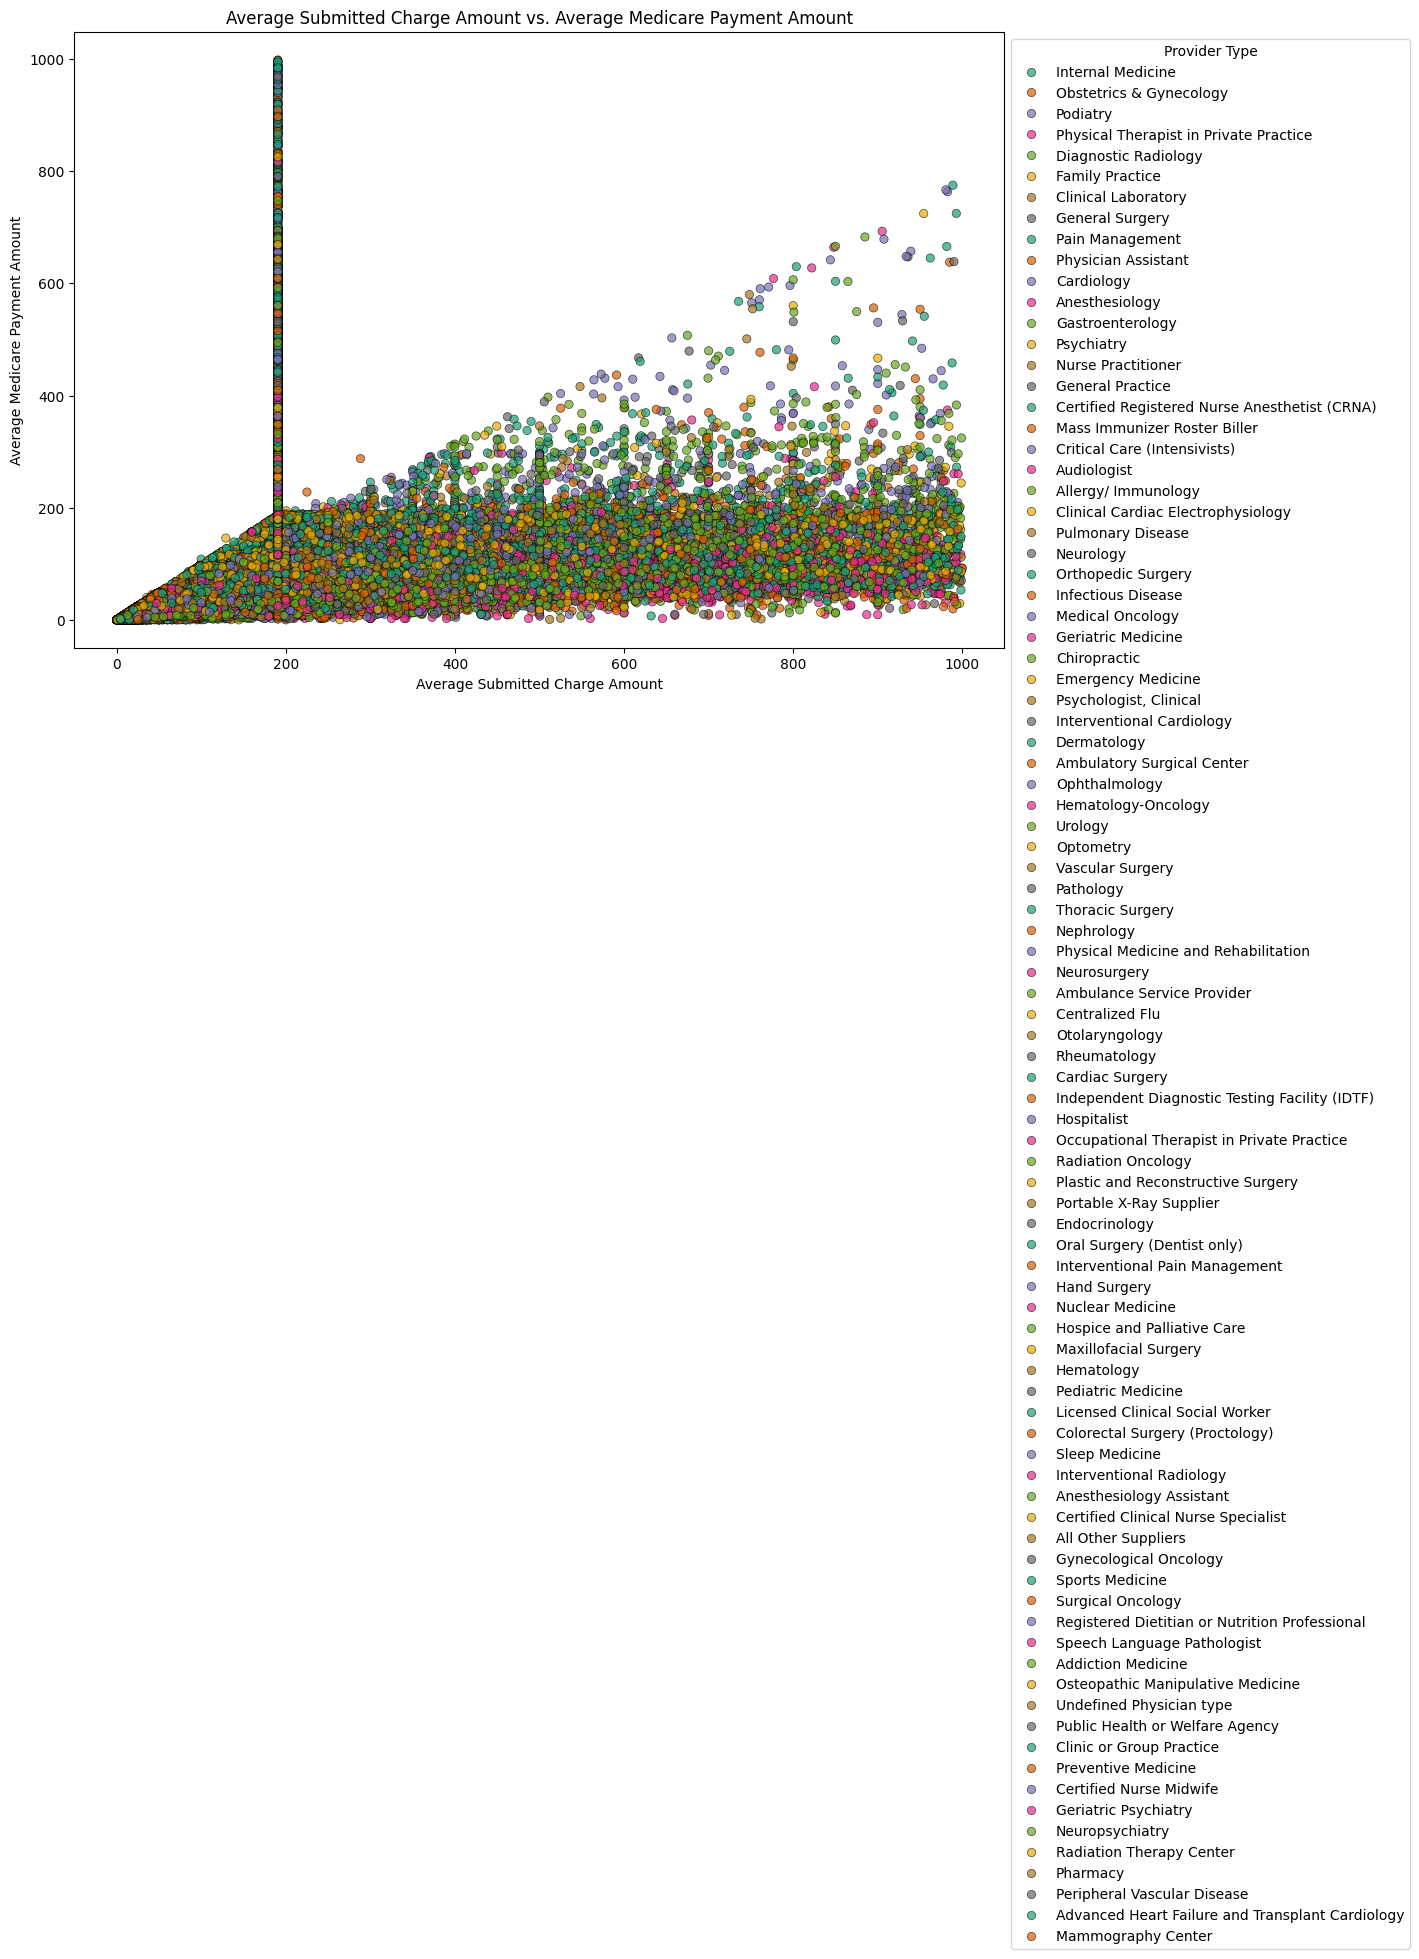

In [19]:
plt.figure(figsize=(12, 8))

# Scatter Plot of Average Submitted Charge vs. Average Payment
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', data=data, hue='Provider Type', palette='Dark2', alpha=0.7, edgecolor='k')

# Set title and labels
plt.title('Average Submitted Charge Amount vs. Average Medicare Payment Amount')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')

# Add a legend with a title for Provider Type
plt.legend(title='Provider Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


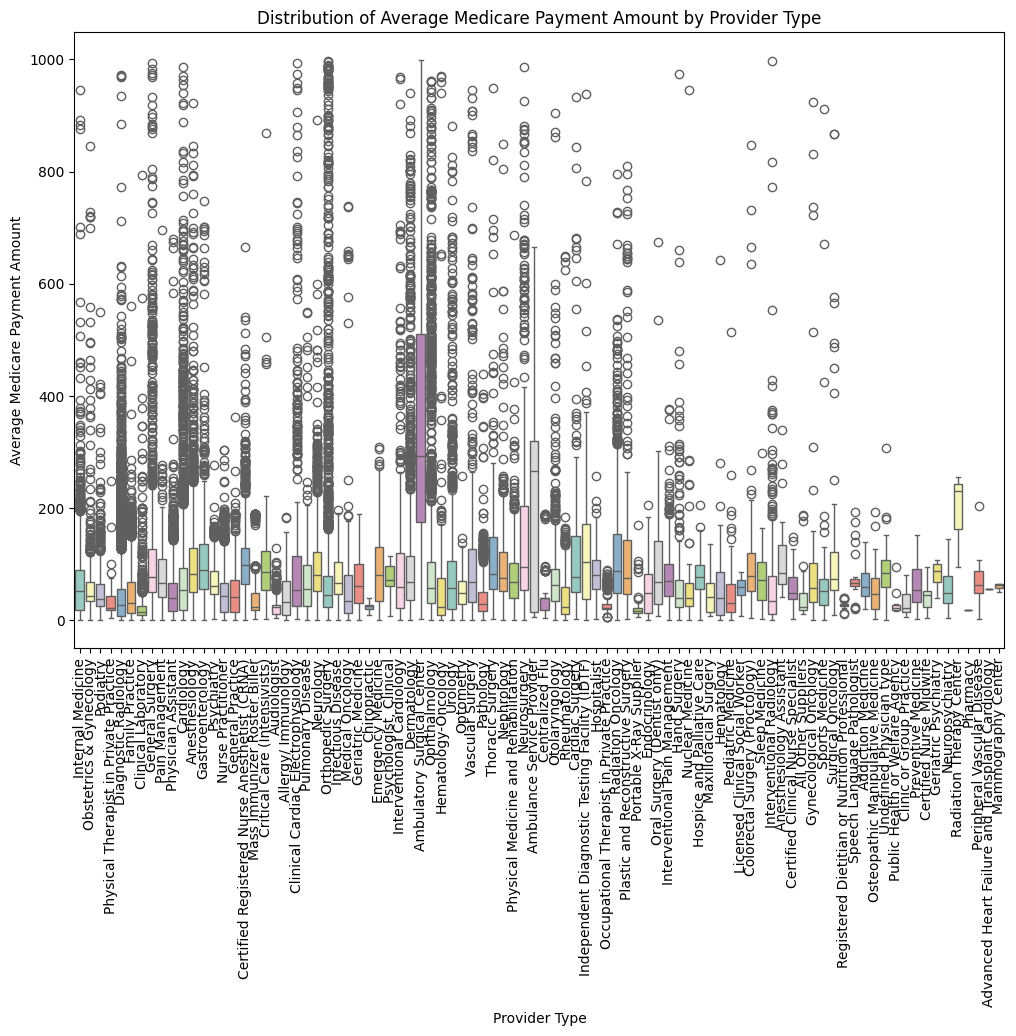

In [20]:
plt.figure(figsize=(12, 8))

# Boxplot of Average Medicare Payment Amount by Provider Type
sns.boxplot(x='Provider Type', y='Average Medicare Payment Amount', data=data, palette='Set3')

# Set title and labels
plt.title('Distribution of Average Medicare Payment Amount by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Average Medicare Payment Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


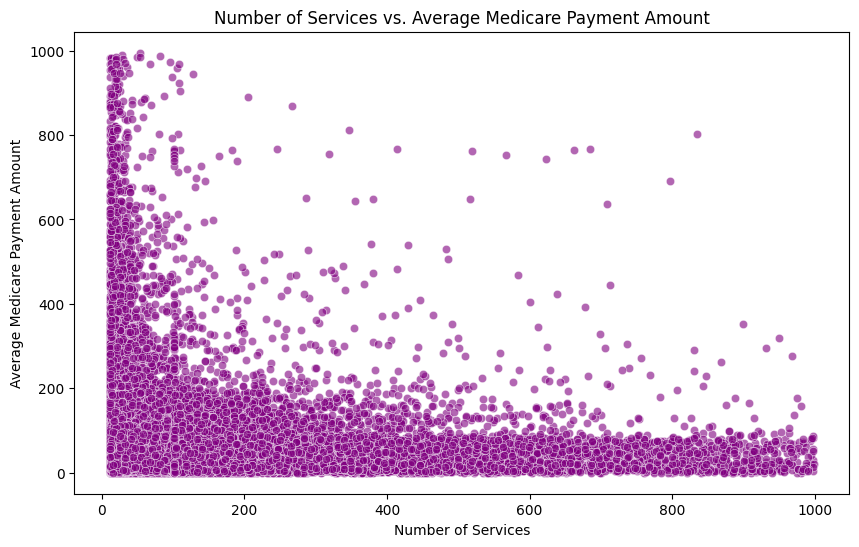

In [21]:
# Subset the data to include only a portion of the dataset
subset_data = data.sample(frac=0.5, random_state=42)

plt.figure(figsize=(10, 6))

# Scatter Plot of Number of Services vs. Average Medicare Payment Amount
sns.scatterplot(x='Number of Services', y='Average Medicare Payment Amount', data=subset_data, color='purple', alpha=0.6)

# Set title and labels
plt.title('Number of Services vs. Average Medicare Payment Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')

# Display the plot
plt.show()


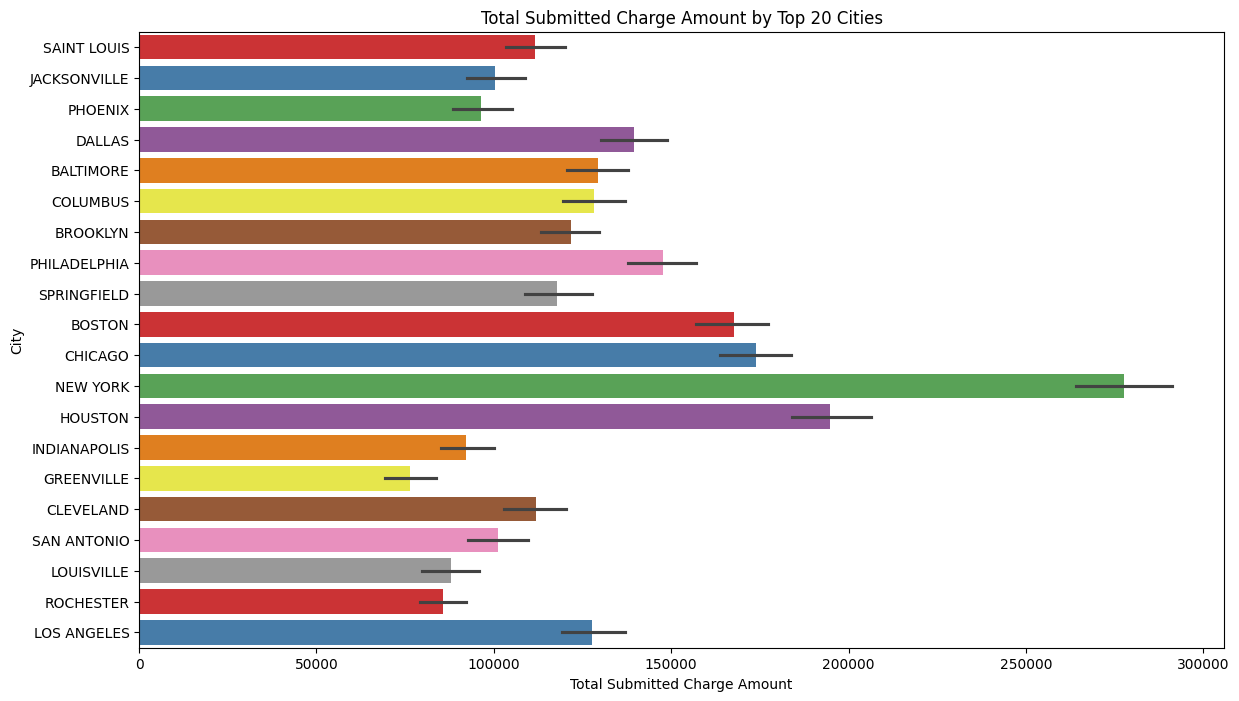

In [22]:
# Extract the top 20 cities with the most providers
top_20_cities = data['City of the Provider'].value_counts().head(20).index

# Filter the data to include only providers from the top 20 cities
filtered_city_data = data[data['City of the Provider'].isin(top_20_cities)]

plt.figure(figsize=(14, 8))

# Barplot of Average Submitted Charge Amount by City
sns.barplot(x='Average Submitted Charge Amount', y='City of the Provider', data=filtered_city_data, estimator=sum, palette='Set1')

# Set title and labels
plt.title('Total Submitted Charge Amount by Top 20 Cities')
plt.xlabel('Total Submitted Charge Amount')
plt.ylabel('City')

# Display the plot
plt.show()


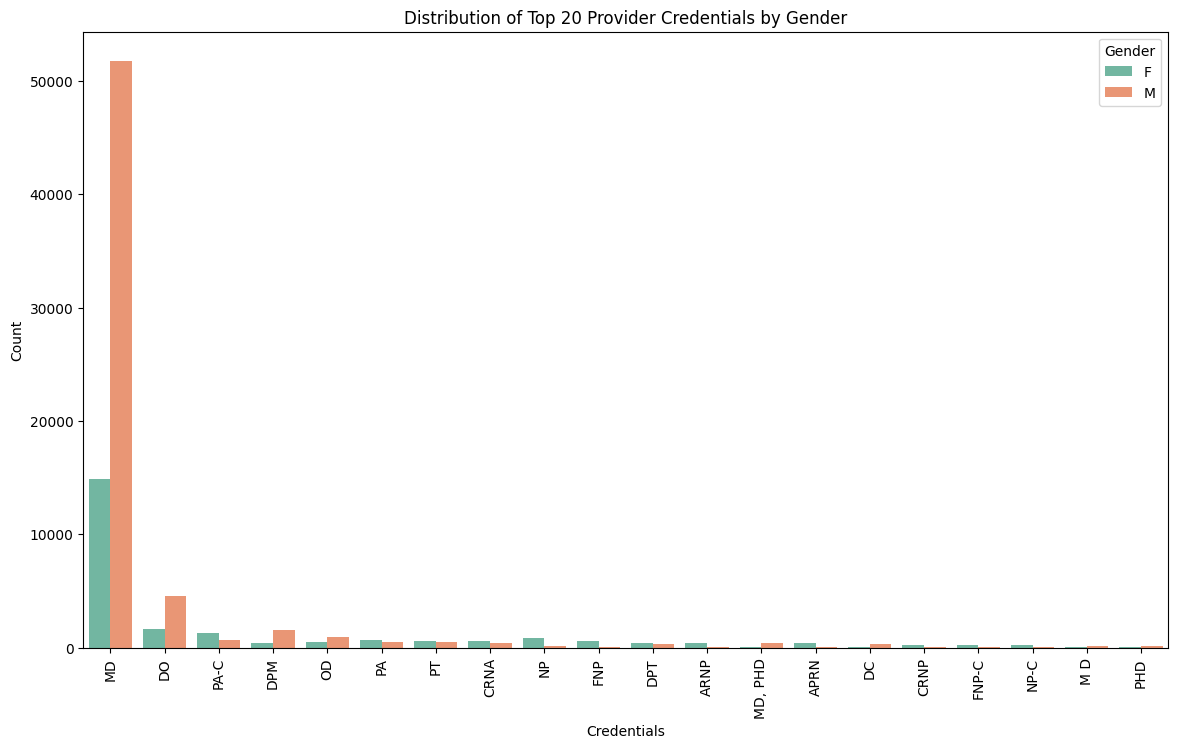

In [23]:
# Remove leading and trailing whitespaces from 'Credentials of the Provider' and 'Gender of the Provider'
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.strip()
data['Gender of the Provider'] = data['Gender of the Provider'].str.strip()

# Extract the top 20 provider credentials
top_20_credentials = data['Credentials of the Provider'].value_counts().head(20).index

# Filtered data to include only rows with the top 20 credentials
filtered_data = data[data['Credentials of the Provider'].isin(top_20_credentials)]

plt.figure(figsize=(14, 8))

# Countplot of Distribution of Top 20 Provider Credentials by Gender
sns.countplot(data=filtered_data, x='Credentials of the Provider', hue='Gender of the Provider', order=top_20_credentials, palette='Set2')

# Set title and labels
plt.title('Distribution of Top 20 Provider Credentials by Gender')
plt.xlabel('Credentials')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add a legend with a title for gender
plt.legend(title='Gender')

# Display the plot
plt.show()


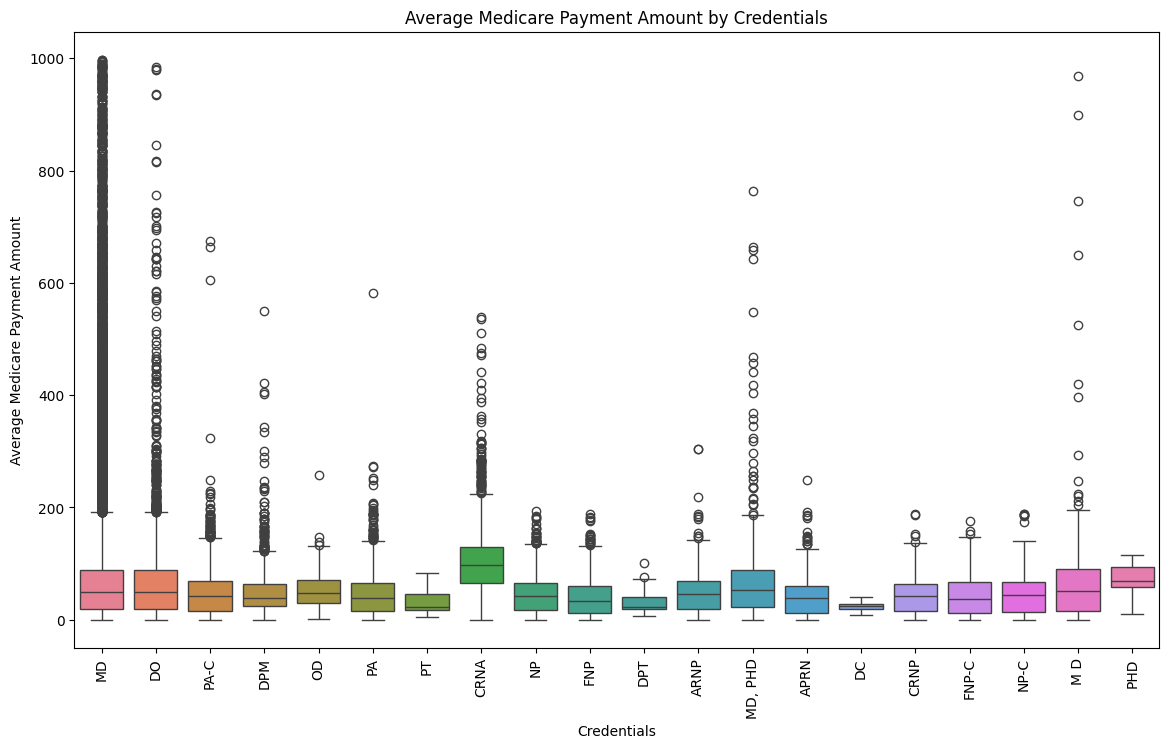

In [24]:
plt.figure(figsize=(14, 8))

# Boxplot of Average Medicare Payment Amount by Credentials
sns.boxplot(x='Credentials of the Provider', y='Average Medicare Payment Amount', data=filtered_data, order=top_20_credentials, palette='husl')

# Set title and labels
plt.title('Average Medicare Payment Amount by Credentials')
plt.xlabel('Credentials')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [25]:
print("\nEDA completed.")


EDA completed.
